# Project2: Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (SM) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`
See Section 2.2 for a description of the dataset.
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

the a list of objects (particles) whose variables are split by commas `","` in the following orger:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

---

In addition to the SM events we are also provided simulated events from `Beyond Standard Model` (BSM) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description

### Overview
The task is to design an anomaly detection algorithm which is trained on the SM dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a laten space (bottleneck). 

You will then need to evaluate and discuss the performance of your `AutoEncoder` on the exotic models listed above, and come up with an appropiate metric to identify events from non SM physics.

# **Breakdown**

In the project report you will be assessed in the following way.

1. **Data exploration and preprocessing (20%):** Inspect the datasets; visualise the data (e.g. tables, plots, etc) in an appropriate way; study the composition of the dataset; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promissing approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (30%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. 
4. **Discussion, style throughout (20%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


## Data Preprocessing
* The data is provided in a CSV (text) format with semicolon and comma seperated list with **one line per event**. We need to convert this into an appropiate format for our neural networks. 
* Since the number of particles per event is variable you will need to **truncate** and **mask** particles in the event. The following steps need to be perfomed on the SM (background) sample:
     1. Create variables where you count the number of electrons, photons, muons, jets and bjets in the event (ignore charge) before any truncation.
     2. Choose an appropiate number of particles to study per event (recommended: **8** particles are used in the paper)
     3. Check the particles are sorted by energy (largest to smallest)
     4. If the event has more than 8 particles choose the **8 particles** with **highest energy and truncate** the rest.
     5. convert energy and momentum variables by logarithm (e.g., `log`) - this is to prioritise differences in energy **scale** over more minor differences. 
     6. If the event has less than 8 particles, create kinematic variables with 0 values for the missing particles.
* The final set of training variables should look something like this (the exact format is up to you)
    |N ele| N muon| N jets| N bjets| N photons| log(MET)| METphi| log(E1)| log(pt1)| eta1| phi1| ... | phi8|
    |-|-|-|-|-|-|-|-|-|-|-|-|-|
    
    7. After the dataset is ready, use `MinMaxScalar` or similar to standardise the training variables over the SM dataset
* After the SM dataset has been processed use the same processing on the BSM (signal samples). Use the same standardisation functions as on the SM dataset, *Do not recalculate the standardisation*.
* Keep associated metatata (`event ID; process ID; event weight;`) though this does not need processing. 
* Randomise and split the SM (background) dataset into training and testing datasets (the BSM samples don't need to be split (*Why?*))
* *Hint*: It is suggested that you write a class or function for the preprocessing which takes a csv path as input and provides the processed dataset. After you have done the data processing its suggested you save the datasets so as to not have to recalculate them again if the kernel is restarted. 

## Training
* Design an appropiate algorithm which reconstrucuts the input variables after going though a laten space. Choose an appropiate cost function.
    * The suggested method for ease of implementation is the `AutoEncoder`
    * However, if you consider learning about or trying something else, as described in the paper, you should feel welcome to try `VAEs`, `ConvAEs`, `ConvVAEs`, etc. Don't feel you **have** to create an `AE`.

* Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
* It is suggested to create a class or function around your algorithm which allows you to easily tweek hyperparameters of the model (depth, number of nodes, number of laten variables, activation functions, regularisation, etc)
* Train the model over several parameters to find the best algorithm. Document the process throught and discuss your choices. Keep track of validation performance. Save the models the best points. 
* Explore the results and document your findings. Ask as many questions about your model as you can, and document your findings. Does the model generalise well to data it hasn't seen?

## Evaluation
In the evaluation explore different datasets an try answer as many questions about the performance as possible. 
* Evaluate the performance of the `AE` on BSM dataset. Which models are more or less similar to the SM?
* Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event? 
* Explore SM events. Which look more anomolous than others? Are there any particular features which are responsible, e.g. particle counts, MET ranges, etc.? 
* Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

---

To complete this project, you should **Submit your Jupyter notebook** as a "report." See the comments below on documentation,



**You should submit by Friday 10th Feb 2023 at 10AM:**
* your report notebook via Turnitin.
    

For all task we're not looking for exceptional performace and high scores (although those are nice too), **we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence takes a very long time so **don't spend hours on training hundreds of epochs.** Be conservative on epoch numbers (30 is more than enough) and use appropiate techniques like EarlyStopping to speed things up. Once you land on a good model you can allow for longer training times if performance can still improve.



### Documentation

**Change the filename to contain Name_Surname**

Your report notebook should run without errors and give (mostly) reproducible results. **Please dont clear the report before submitting**! It is important that **all** code is annotated and that you provide brief commentary **at each step** to explain your approach. Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material, but do try to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of the steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in "Markdown" format. Do not add any substantial commentary as a code comment in the same cell as the code. To change the new cell into markdown select from the drop down menu on the bar above the main window (the default is code)

# Happy Anomaly Hunting
---
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.</p>&mdash; Josh Wills (@josh_wills) <a href="https://twitter.com/josh_wills/status/198093512149958656?ref_src=twsrc%5Etfw">May 3, 2012</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

Your code follows....

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Standard import(s)
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pickle

In [3]:
# Keras import(s)
#if float(tf.__version__[:3])>2.8:
from tensorflow.keras.utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import BatchNormalization,Input, Dense, Dropout, Flatten, Reshape, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Lambda, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import mean_squared_error 
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.backend import set_image_data_format
from tensorflow.keras.optimizers import Adam
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
#Function that opens user input file and calculates the number of events
def filelength(fname):
    with open(fname, 'r') as file:
        reader = csv.reader(file,delimiter = delims)
        row_count = sum(1 for row in reader)                   #sum rows in reader object
        file.close()
    return row_count

In [5]:

#Function thattakes a data file and processes the data inside, it returns a 2D array where each row corresponds to an events
def processing(fname,row_count):

    vals = np.zeros((row_count,39)) #Create empty 2D array with dimentions number of events x number of features
    with open(fname, 'r') as file:
        reader = csv.reader(file,delimiter = delims)        # delims = ','


        count = 0

        
        for row in reader:
            
            # split row by ';' so every value is now its own entry
            for i in range(len(row)):
                row[i] = row[i].split(';')



            # Convert row to a numpy array
            row_array = np.array(np.concatenate(row))[:-1] #slice to the penultimate value since the last entry is empty for each row
            
            #count number of each particle type
            #Ignore charge of electrons and muons. 
            no_el = np.count_nonzero(row_array == 'e-') +np.count_nonzero(row_array == 'e+')   #sum negative/positive counts for same particle
            no_ph = np.count_nonzero(row_array == 'g')
            no_mu = np.count_nonzero(row_array == 'm-') + np.count_nonzero(row_array == 'm+')
            no_je = np.count_nonzero(row_array == 'j')
            no_bj = np.count_nonzero(row_array == 'b')
            
            #split array into 5 subarrays. The first corresponds to event data, the other 4 correspond to the four particle types.
            split = np.array(np.array_split(row_array, len(row_array)/5)) 
            
           
            
            sortE = np.array(sorted(split[1:,1:], key=lambda x: x[0], reverse=True)) #Sort 4 particle sub-arrays by energy
            
            MET = float(split[0,3])                  #Convert energies to floats 
            METphi = float(split[0,4])
            logMET = np.log(MET)                     
            trunc = sortE[:8].astype(float)          #Only keep 8 highest energy particle sub-arrays
            trunc[:,0] = np.log(trunc[:,0] )         #Take logs of particle energies and momentums
            trunc[:,1] = np.log(trunc[:,1] )


            addzeros = np.zeros(4)                   #Create array of 4 zeroes
            
            #Iterate through 2d particle array and append zeroes array until there are 8 rows (corresponding to 8 particles)
            while len(trunc) < 8:
                trunc = np.vstack([trunc,addzeros])
                
            trunc = trunc.flatten()             #Flatten particle 2D-array into a 1D array               
            array = np.array([no_el,no_mu, no_je, no_bj,no_ph,logMET,METphi])   #Create a 1D array for the event data
            
            #concatenate particle + event data arrays to give an array of length 39 representing the 39 features.
            arr = np.concatenate((array,trunc))                                 
            vals[count] = arr                                                   #Append event array to a row in the vals array

            count += 1
    return vals


        
    
   

     
    

In [6]:
#Function that takes in the 2d array for a input signal dateset as well as the scaling calculated from the SM dataset
#It applies this scaling to scale the features of the signal dataset.
def transform(vals,scaler):
    df = pd.DataFrame(vals)                                              #convert 2d array to pandas dataframe
    dfscaled = pd.DataFrame(scaler.transform(df),columns = df.columns)   #scale signal features
    return dfscaled

In [7]:
#Shuffle data and split into 80% training and 20% test data. Used for background data
def split(dfscaled):
    df_shuffled = np.random.permutation(dfscaled)                        #shuffles rows of dataframe.
    
    #Split the data to train the model on 80% of the data and hold back 20% to use for testing the quality of the model.
    X_train, X_test = train_test_split(df_shuffled, test_size=0.2)       
    return X_train, X_test

#Function to plot bar chart for mean of scaled values for each feature. I use this to visualise unseen SM data, and BSM datasets.
def visualise(data,title,col_names):
    mean_feat =  np.mean(data,axis = 0)
    fig,ax = plt.subplots()
    #plot bar chart
    ax.bar(col_names,mean_feat,alpha = 0.5 )
    for i,v in enumerate(mean_feat):
        plt.text(i, v + 0.02, str(round(v, 3)), color='red', ha='center', va='bottom',rotation = 90)
    ax.set_title(title, y=1.1, fontsize=16)

    plt.xticks(rotation ='vertical')
    plt.ylabel("mean scaled value")

    plt.show()

In [8]:
scaler = preprocessing.MinMaxScaler()  

fname = 'background_chan2b_7.8.csv'
delims = ','
row_count = filelength(fname)            #Call function to calculate # of events/rows in dataset
vals = processing(fname,row_count)       #Call function to process data
df = pd.DataFrame(vals)

#Fit the scaling to the background data, and then apply the scaling to the features of the dataset.
dfscaled_bck = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)    

if fname == 'background_chan2b_7.8.csv':                 #Only split data for main SM events 
    X_train, X_test = split(dfscaled_bck)

    # save X_train data in a separate file. This is used in best_param_search code to perform a grid search for hyperparamter 
    # optimisation
    with open('X_datafile.pickle', 'wb') as handlex:
        pickle.dump(X_train, handlex, protocol=pickle.HIGHEST_PROTOCOL)
    


We only split the SM events and not the BSM events into train and test data because we want to train the model on the SM events. The trained autoencoder is then used on the BSM data in order to test for anomalies but since we are not training on the BSM data we don't need to split into test/training data.

In [9]:
#Build Autoencoder using the optimal hyperparameters found using a grid search method.
def build_ae(num_dense_layers,first_dense_dim,regularization_factor,act_func,latent_dim = 10,optimiser = 'adam'):
    
    #Build encoder
    input_dim = X_train.shape[1]                  #Define input layer first dimension length equal to number of features in dataset
    input_layer = Input(shape=(input_dim,))    
    
    #Create an initial dense layer 
    encoder = Dense(first_dense_dim, activation="relu", activity_regularizer=regularizers.l1(regularization_factor))(input_layer)
    dim =first_dense_dim/2
    
    #For loop to add number of dense layers corresponding to num_dense_layers best parameter
    for i in range(num_dense_layers - 1):
        encoder = Dense(int(dim),activation="relu")(encoder)
        dim = dim/2                                              #Half the # of nodes for the next dense layer
    
    #Encoder ends with final layer with latent # dimensions.
    encoder = x = Dense(latent_dim, activation="relu")(encoder)  #This is the bottleneck layer
    
    #Build decoder that mirrors the encoder. 
    decoder = encoder
    #For loop to add number of dense layers corresponding to num_dense_layers best parameter. 
    for i in range(num_dense_layers - 1):
        dim = dim*2
        decoder = Dense(int(dim), activation="relu")(decoder)
    decoder = Dense(first_dense_dim, activation="relu")(decoder)
    decoder = Dense(input_dim, activation=act_func)(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    #Compile model with mean_squared_error loss function to minimise difference between input data and reconstruced data
    autoencoder.compile(optimizer=optimiser, loss='mean_squared_error')      
    return autoencoder



My function "build_ae" creates the architecture for my auto encoder used for anomaly detection. To construct the model, I have defined the latent dimension, which is the bottleneck of the network. The encoder reduces the dimensionality of the dataset to the bottleneck dimension.  The idea is that the network tries to learn a lower dimensional representation of the data that will still capture its important features thus allowing the decoder to reconstruct the original data. Since we are training the model on SM data, unseen SM data should have low reconstruction error whereas BSM data should have high reconstruction error.

The higher the latent dimension, the less compressed the data will be so the easier it will be for the training data to be reconstructed, however this means that the model may not generalise well to unseen data. A lower latent dimension means more compression so it may be difficult to retain important features of the SM data in very low dimensional representation. 

My function facilitates the use of sklearn's GridSearchCV which allows for a dictionary of hyperparameters to be inputted, and it will scan over the different permutations of parameters to try and find the optimal ones. For my gridsearch i use the parameter scoring = 'neg_mean_squared_error'. This means that the gridsearch will try to maximise the negative mean squared error, ie minimise the mean squared error between the  true and predicted values. The parameters used in this gridsearch are: intial dense layer dimension, number of dense layers, regularization factor and activation function. 

More dense layers mean that more complex systems can be explored but can lead to overfitting on the training data. Regularisation can be useful to prevent overfitting. The activation functions used in the gridsearch were 'Linear' and 'LeakyRelu'. This is because even the background events are scaled to an interval [0,1] suggesting that sigmoid might be the preferred method, the BSM events are scaled using the scaling fitted to the background events and thus may fall outside the interval [0,1]. Therefore LeakyReLU or Linear activation seemed more appropriate as both can be negative.



In [10]:
#Load best parameters from file created by best_param_search code.
with open('best_params.pickle', 'rb') as handle:
    get_params = pickle.load(handle)
print(get_params)

{'act_func': 'linear', 'first_dense_dim': 256, 'num_dense_layers': 1, 'regularization_factor': 0.0001}


In [11]:
#Call function to build model with parameters found by gridsearch.
autoencoder = build_ae(get_params['num_dense_layers'],get_params['first_dense_dim'],get_params['regularization_factor'],get_params['act_func'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 dense (Dense)               (None, 256)               10240     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 dense_2 (Dense)             (None, 256)               2816      
                                                                 
 dense_3 (Dense)             (None, 39)                10023     
                                                                 
Total params: 25,649
Trainable params: 25,649
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Define an condition to stop training the model if the validation loss does not improve in 5 iterations.
#This helps to prevent overfitting
early_stopping= EarlyStopping(monitor='val_loss',patience = 5, restore_best_weights = True)

In [13]:



# train the autoencoder with 20% of training data used for validation. 
history =autoencoder.fit(X_train, X_train, epochs=30, batch_size=500, validation_split=0.2,callbacks=[early_stopping])
    

Train on 217771 samples, validate on 54443 samples
Epoch 1/30
214500/217771 [============================>.] - ETA: 0s - loss: 0.0218

C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 2s 10us/sample - loss: 0.0216 - val_loss: 0.0090
Epoch 2/30
217771/217771 [==============================] - 2s 9us/sample - loss: 0.0079 - val_loss: 0.0071
Epoch 3/30
217771/217771 [==============================] - 2s 9us/sample - loss: 0.0067 - val_loss: 0.0064
Epoch 4/30
217771/217771 [==============================] - 2s 9us/sample - loss: 0.0063 - val_loss: 0.0061
Epoch 5/30
217771/217771 [==============================] - 2s 10us/sample - loss: 0.0060 - val_loss: 0.0058
Epoch 6/30
217771/217771 [==============================] - 2s 10us/sample - loss: 0.0057 - val_loss: 0.0055
Epoch 7/30
217771/217771 [==============================] - 2s 9us/sample - loss: 0.0053 - val_loss: 0.0052
Epoch 8/30
217771/217771 [==============================] - 2s 11us/sample - loss: 0.0051 - val_loss: 0.0050
Epoch 9/30
217771/217771 [==============================] - 2s 10us/sample - loss: 0.0049 - val_loss: 0.0049
Epoch 10/30
217771/217771 [=======

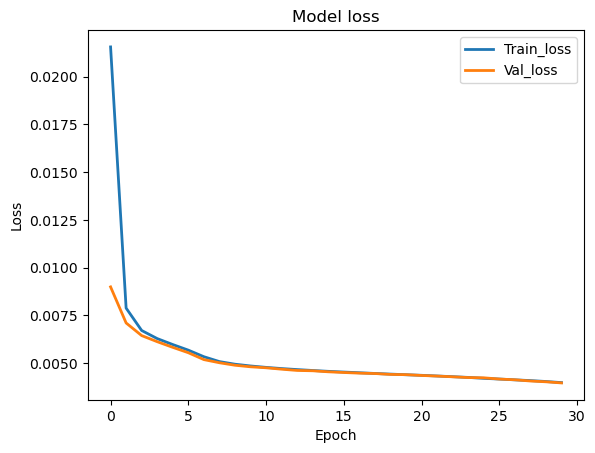

In [14]:
plt.plot(history.history['loss'], linewidth=2, label='Train_loss')
plt.plot(history.history['val_loss'], linewidth=2, label='Val_loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Above is a plot of the loss against epochs for the model training. The training loss is initially very high and then immediately descends rapidly which is expected because at first it has no idea what the important features in the data are. The validation loss decreases with the training loss which shows that the model is generalising to new data well. If the loss of validation begins to increase we would conclude that the model is being significantly overfit and but that is not the case here.

In the section where the reconstruction losses are plotted for the unseen (X_test) data we see that the model generalises quite well to unseen data. To see this, the reconstruction loss for the X_test data has been calculated (variable name pred_back_loss). The percent of the loss values below a certain threshold can be calculated. Above we see that after training the reconstruction loss on the seen SM data is approximately 0.005. Therefore, below I find the percentage of the unseen SM data reconstruction loss that falls below 0.01. This comes out as 91.2%, showing that the model can reconstruct the unseen SM background data fairly well. I go on to compare this with the reconstruction losses for the BSM datasets.


In [15]:
#Function that creates reconstructions of input data and calculates reconstruction loss
def prediction_loss(x):
    prediction = autoencoder.predict(x)
    
    #calculate losss via mean_squared_error between reconstructed and original data
    pred_loss = tf.keras.losses.mean_squared_error(prediction,x)  
   
    
    pred_loss = K.eval(pred_loss)   #method to evaluate tensor object for the reconstruction loss in order to get the loss value
   
    return pred_loss


#Function to plot overlayed histograms for the SM and BSM datasets reconstruction losses.
def plot_loss(pred_loss, pred_bck_loss,nfname):
    plt.hist(pred_loss,density=True,bins = 50,alpha = 0.5,label = 'BSM reconstruction loss')
    plt.hist(pred_bck_loss,density=True,bins = 50,alpha = 0.5, label = 'SM reconstruction loss')
 
    plt.title(nfname)
    plt.legend(loc ='upper right')
    plt.xlabel('Reconstruction loss')
    plt.ylabel('density')
    
    plt.show()
   
   
    


In [16]:
#Create list of signal data files 
newfiles = ['chacha_cha300_neut140_chan2b.csv','chacha_cha400_neut60_chan2b.csv','chacha_cha600_neut200_chan2b.csv'
          ,'chaneut_cha200_neut50_chan2b.csv','chaneut_cha250_neut150_chan2b.csv',
          'gluino_1000.0_neutralino_1.0_chan2b.csv','pp23mt_50_chan2b.csv','pp24mt_50_chan2b.csv','stlp_st1000_chan2b.csv']


col_names = ['N_ele', 'N_muon', 'N_jets','N_bjets','N_photons' , 'logMET','METphi','log(E1)','log(pt1)','eta1',  'phi1',
              'log(E2)','log(pt2)', 'eta2', 'phi2','log(E3)','log(pt3)', 'eta3', 'phi3','log(E4)','log(pt4)', 'eta4', 'phi4',
              'log(E5)','log(pt5)', 'eta5', 'phi5','log(E6)','log(pt6)', 'eta6', 'phi6', 'log(E7)','log(pt7)', 'eta7', 'phi7',
              'log(E8)','log(pt8)', 'eta8', 'phi8'
            ]
#Call function to calculate reconstruction loss on X_test. This is unseen SM data.
pred_bck_loss = prediction_loss(X_test)

#Calculating percentage of unseen data that has reconstruction loss less than 0.01
percent = 100 * len(pred_bck_loss[pred_bck_loss<0.01])/len(pred_bck_loss)
print("Percentage of unseen data that has reconstruction loss less than 0.01: ",round(percent,1),"%")
pred_losses = []
X_BSM =[]

    



C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Percentage of unseen data that has reconstruction loss less than 0.01:  90.9 %


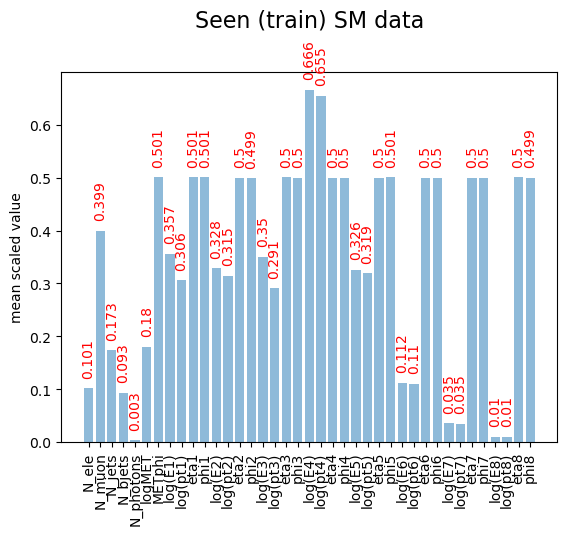

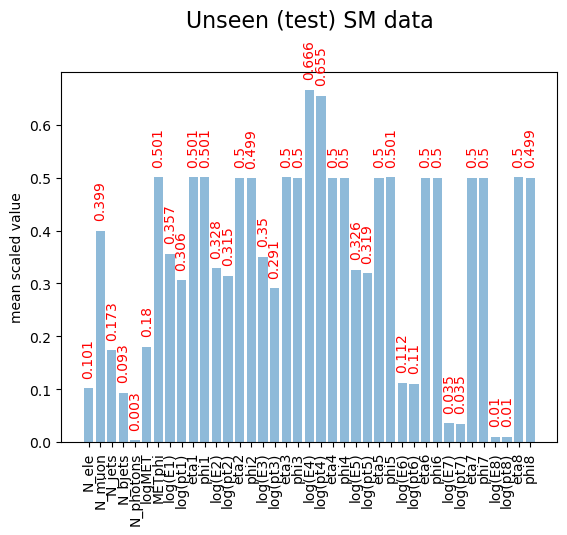

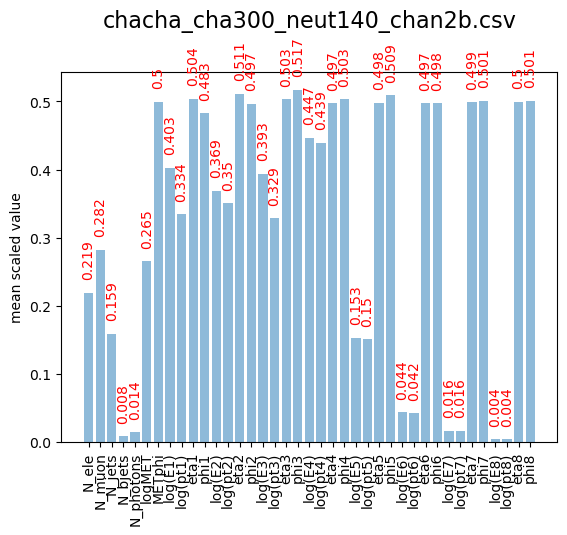

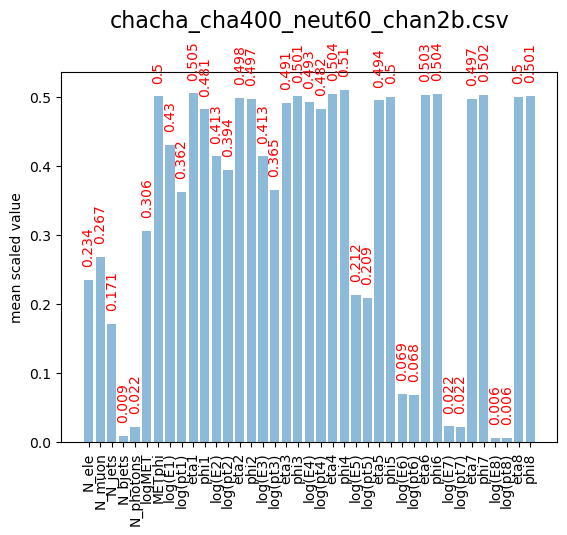

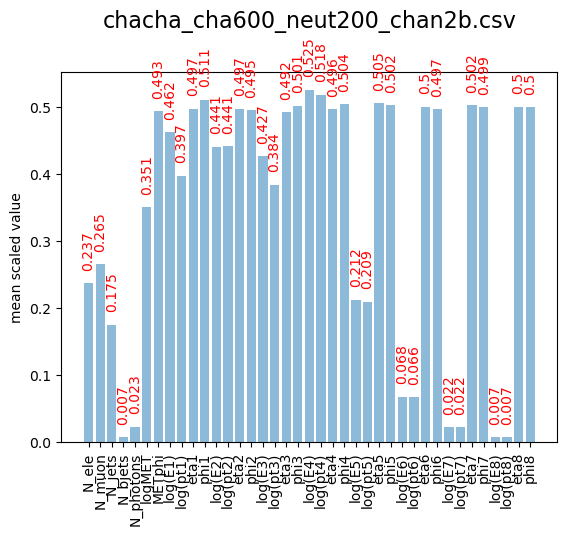

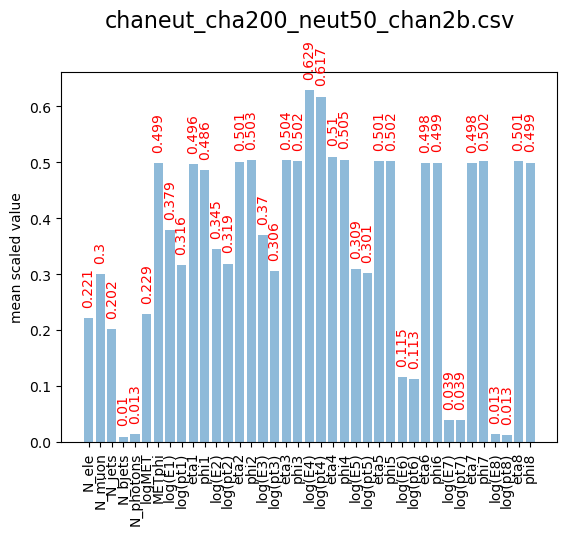

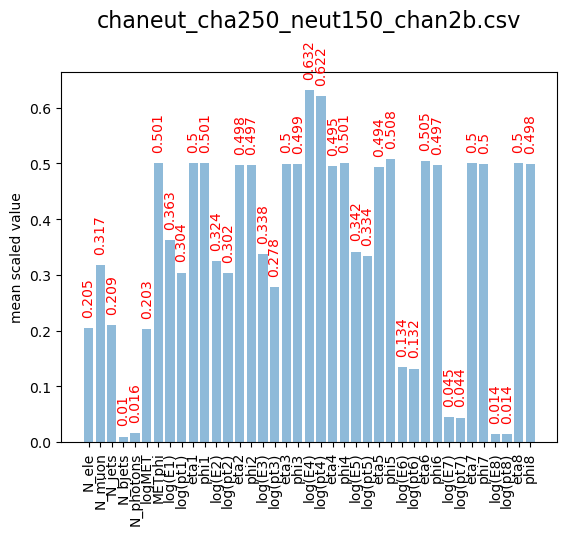

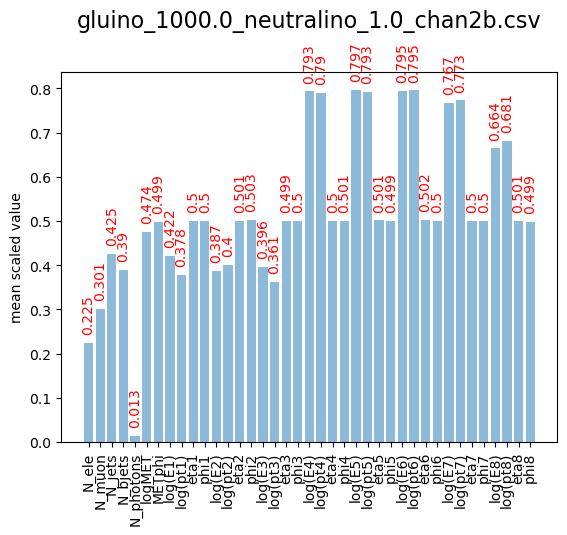

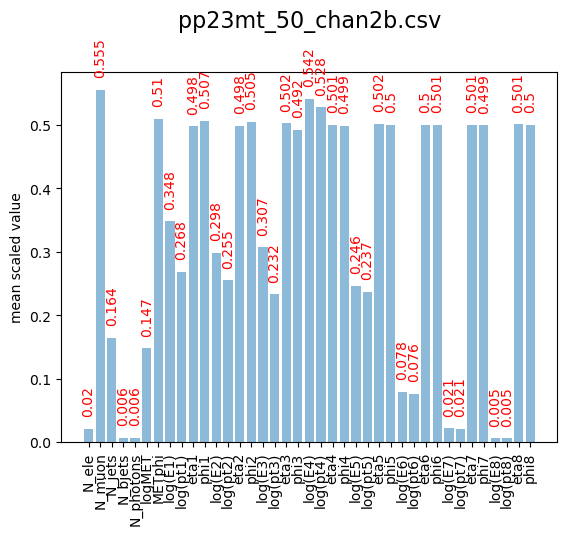

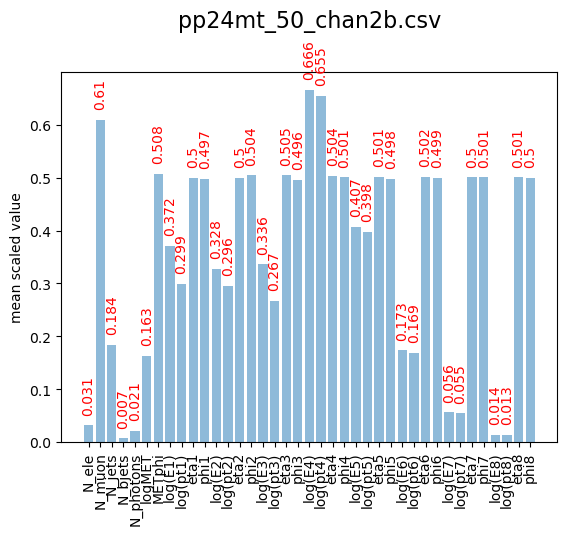

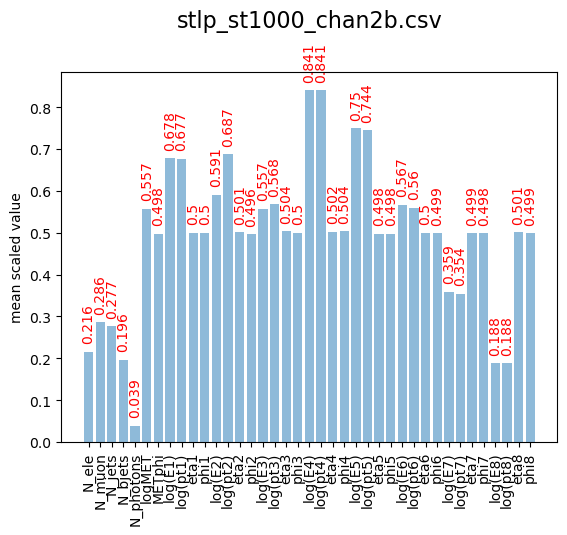

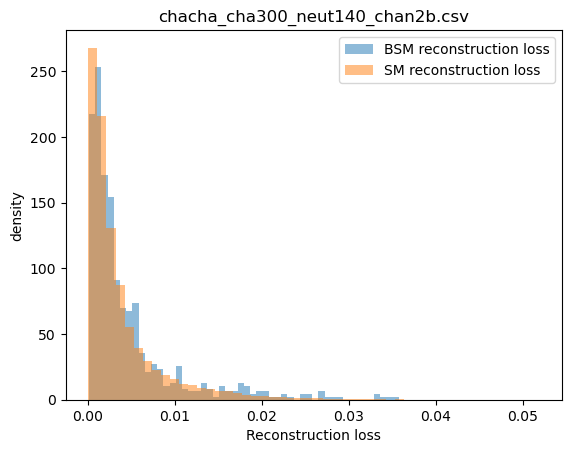

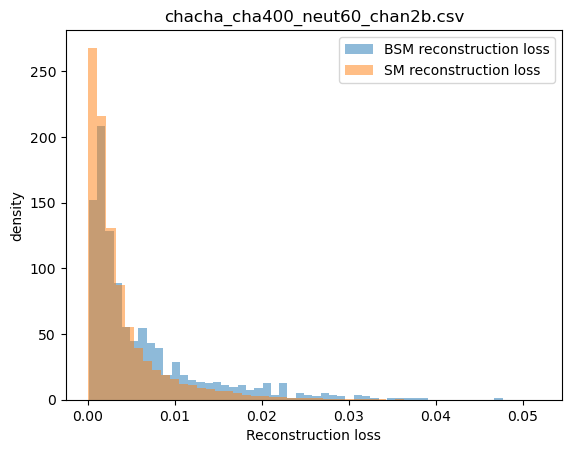

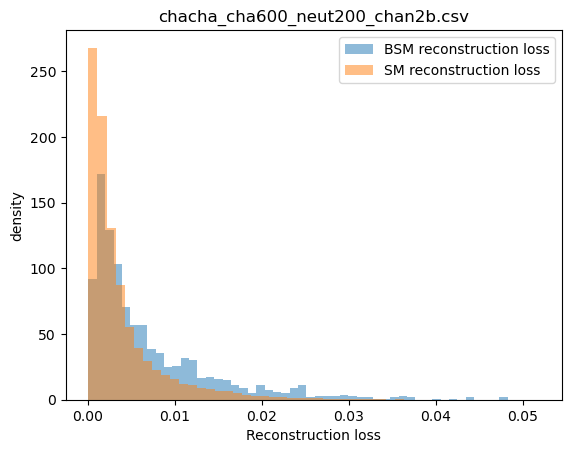

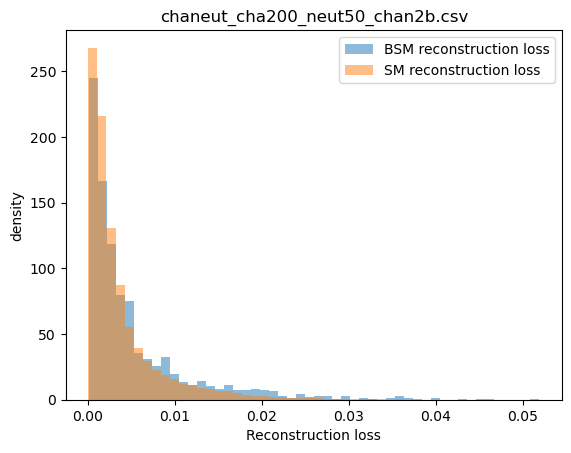

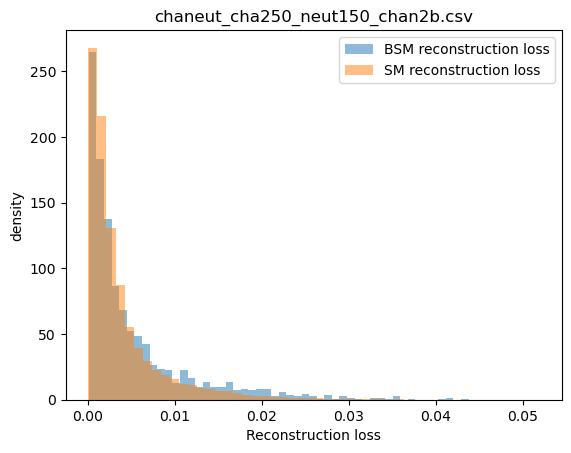

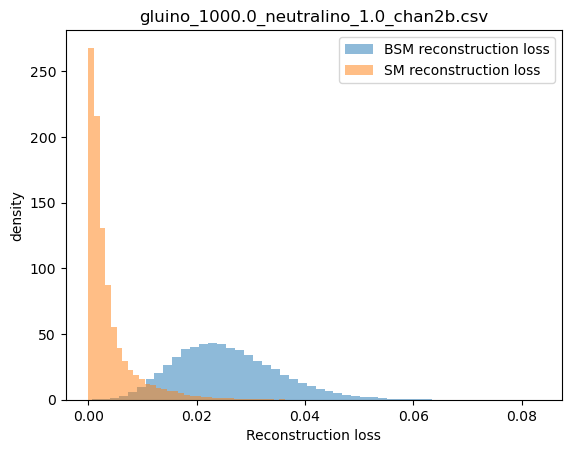

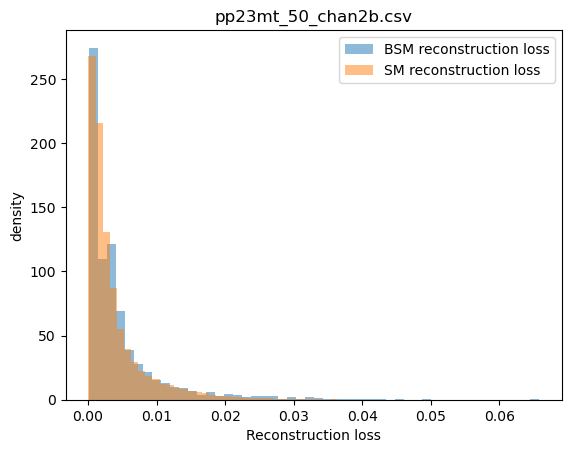

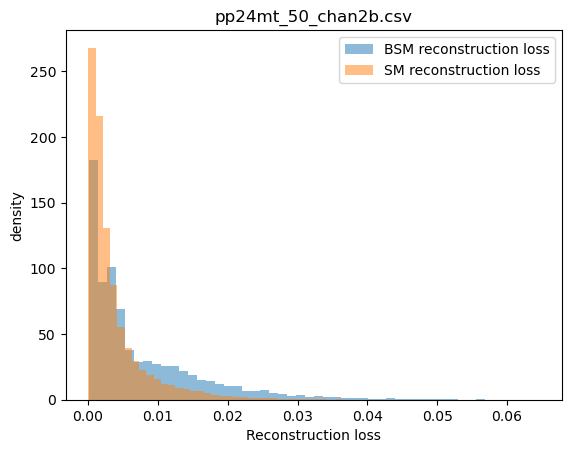

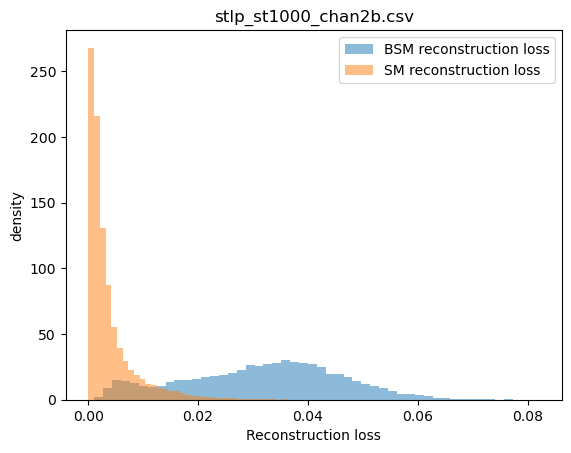

In [17]:
#Call function to visualise X_train and X_test SM datasets.
visualise(X_test,"Seen (train) SM data",col_names)
visualise(X_test,"Unseen (test) SM data",col_names)

#Iterate through BSM data files, process and calculate reconstruction losses for each.
for i in newfiles:
    newfile = i 
    row_count = filelength(newfile)
    vals = processing(newfile,row_count) #Process BSM data 
    dfscaled = transform(vals,scaler)    #scale BSM data using scaling fitted to SM data
    X_new = dfscaled
    X_BSM.append(X_new)
    pred_loss = prediction_loss(X_new)  #Call function to calculate reconstruction loss for BSM data
    pred_losses.append(pred_loss)
    visualise(X_new,i,col_names)
    
#Plot overlayed reconstruction loss histograms for unseen SM and BSM datasets.
for i in range(len(newfiles)):
    plot_loss(pred_losses[i],pred_bck_loss,newfiles[i])

From the data visualisation bar charts, we can first compare the train and test data. The mean values of the features follow the same pattern both with relatively large log energies and momenta for the fourth particle. It is also interesting that the number of photons in the SM charts are both almost 0 showing that there are very few photons in the background events. Compare this to the number of photons in the BSM datasets which are, in general, greater. However for the pp23mt_50_chan2b data there the scaled value for photon number is 0.006 which is of the same order as the SM data. Therefore I expect that this could make the pp23mt_50_chan2b data hard to perform anomaly detection on.

From the reconstruction loss plots for the SM model and BSM models, we can see that there are some BSM datasets for which the model can detect anomalies more easily. For example, where we see two distinct separated peaks, such as with stlp_st1000_chan2b andgluino_1000.0_neutralino_1.0_chan2b, there is clearly greater reconstruction loss than on the background set, indicating apparent anomalies in these datasets. In contrast, the reconstruction loss histogram for the pp23mt_50_chan2b dataset almost exactly overlaps with the SM dataset reconstruction loss histogram, suggesting that the anomalies are very difficult to detect.

In [18]:
#function to calculate true positive, true negative, false positive and false negative
#anomaly scores is the reconstruction loss for the BSM events
def confusion(anomaly_scores,pred_bck_loss,threshold_len):
    
    #Create an array of threshold values that range from the minimum to maximum reconstruction loss of the unseen SM data
    thresholds = np.linspace(min(pred_bck_loss),max(pred_bck_loss),threshold_len)
    tp = []
    fn = []
    
    fp = []
    tn = []
    
    #iterate through the thresholds and calculate the true positive, false negative, false positive and true negatives at each 
    #point
    for i in range(len(thresholds)):
        tp.append(len(anomaly_scores[anomaly_scores > thresholds[i]]))  
        fn.append(len(anomaly_scores[anomaly_scores < thresholds[i]]))
        
        fp.append(len(pred_bck_loss[pred_bck_loss >thresholds[i]]))
        tn.append(len(pred_bck_loss[pred_bck_loss <thresholds[i]]))
        
    return tp,fn,fp,tn,thresholds
        


In [19]:
#Function to calculate the background and signal efficiences. 
def calculate_efficiencies(tp_arr,fn_arr,fp,tn,thresholds,pred_bck_loss,anomaly_scores,newfiles):
    efficiency_BSM = np.zeros((len(thresholds),len(anomaly_scores)))
    efficiency_SM = tn/ len(pred_bck_loss)              #true negative/total # background events 

   
    #iterate through threshold values and calculate signal efficiencies
    for i in range(len(anomaly_scores)):  
        efficiency_BSM[:,i] = tp_arr[:,i]/len(anomaly_scores[i]) #true positive/total # signal events 
        
        
    return efficiency_BSM,efficiency_SM

In [20]:
#function to plot the signal and background efficiencies for each signal dataset.
def plot_efficiencies(SM_efficiencies, BSM_efficiencies,thresholds,nfname):
    
    #Iterate over columns of signal efficiencies 2D array
    for i in range(len(BSM_efficiencies[0])):
        plt.plot(thresholds,SM_efficiencies,label = 'SM')
        plt.plot(thresholds,BSM_efficiencies[:,i], label = 'BSM')
        plt.xlabel('thresholds')
        plt.ylabel('efficiency')
        plt.legend(loc='upper right')
        plt.title(nfname[i])
        plt.show()
 
    
    

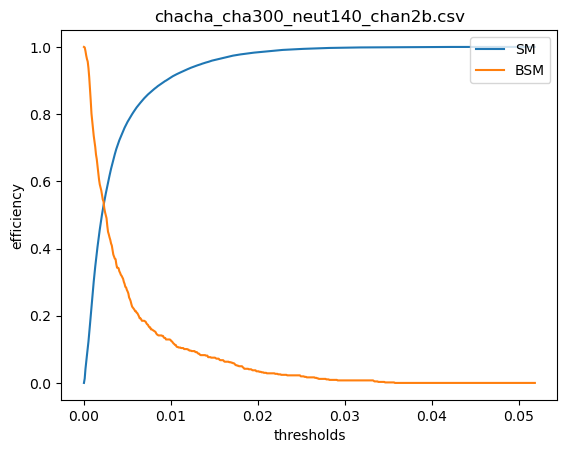

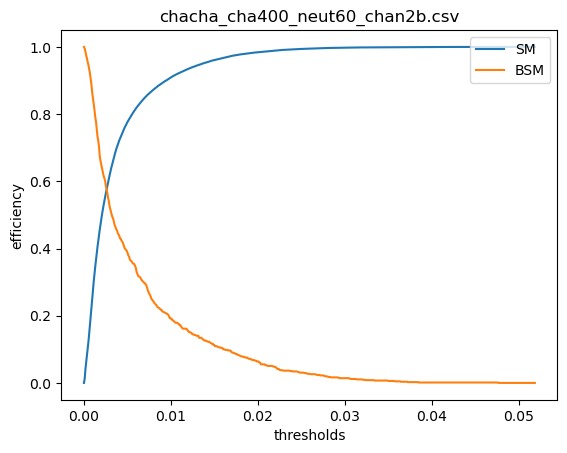

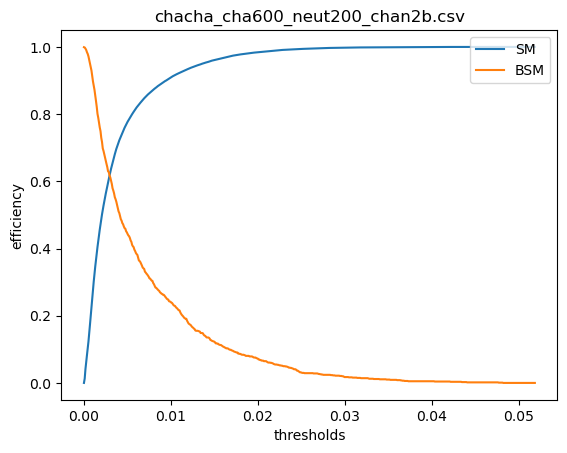

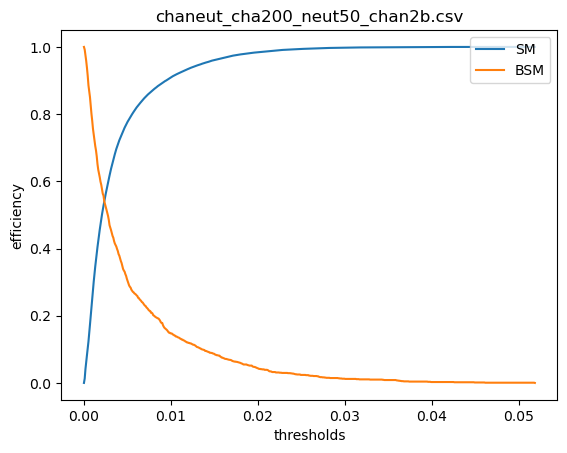

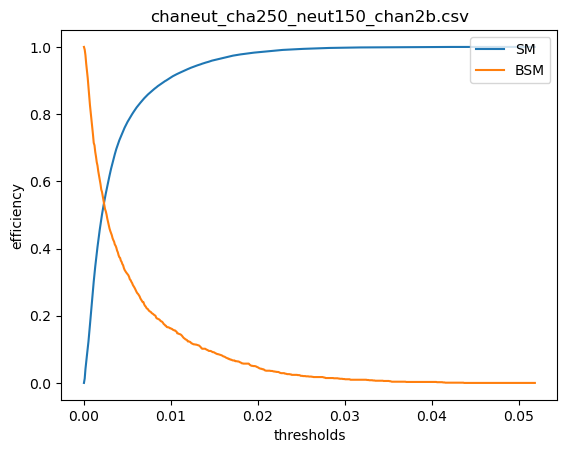

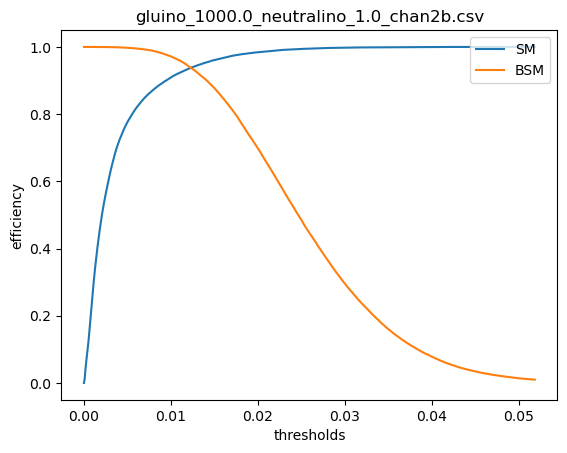

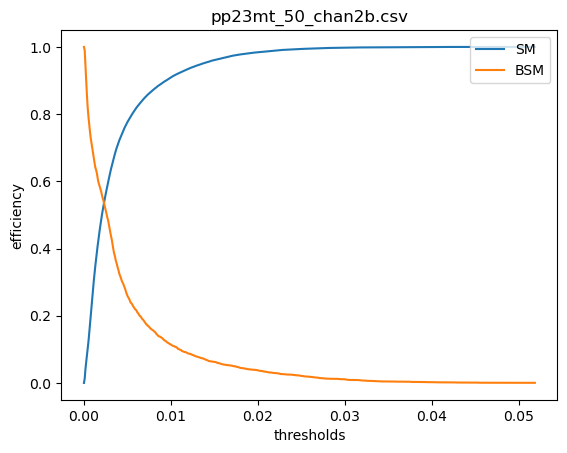

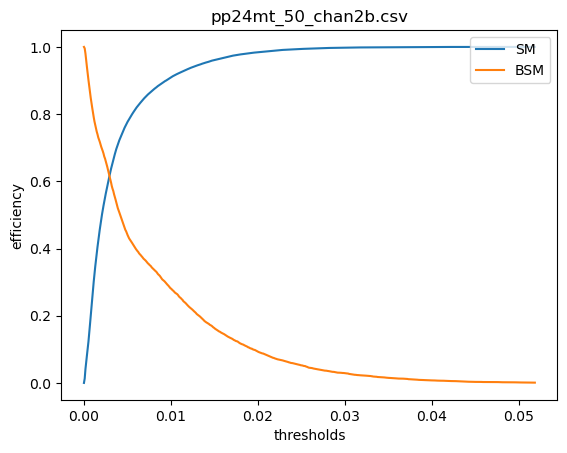

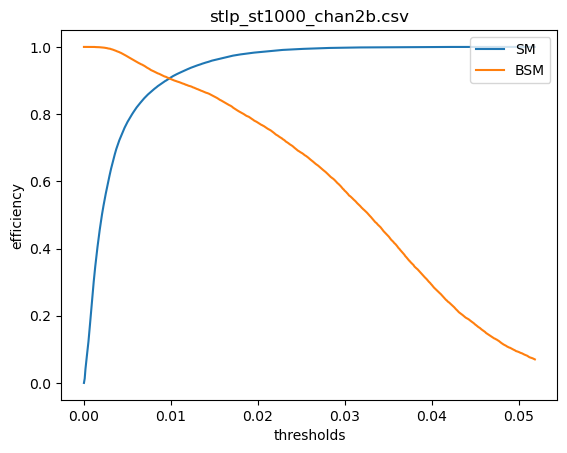

In [21]:

#Define number of thresholds 
threshold_len = 600
tp_arr = np.zeros((threshold_len,len(pred_losses))) # array to store true positives
fn_arr = np.zeros((threshold_len,len(pred_losses))) # array to store false negatives





for i in range(len(pred_losses)):
    tp,fn,fp,tn,thresholds = confusion(pred_losses[i],pred_bck_loss,threshold_len)
    tp_arr[:,i] = tp
    fn_arr[:,i] = fn
tn = np.array(tn)   # list to array 
fp = np.array(fp)


efficiency_BSM,efficiency_SM =calculate_efficiencies(tp_arr,fn_arr,fp,tn,thresholds,pred_bck_loss,pred_losses,newfiles)
plot_efficiencies(efficiency_SM, efficiency_BSM,thresholds,newfiles)

The  gluino_1000.0_neutralino_1.0_chan2b BSM efficiency curve is ideal as it the curves intersect at an efficiency close to 1, meaning that at the given threshold, both the signal efficiency and background efficiencies are high, which is what we want because it means that there are a large number of true positives and true negatives. The perfect efficiency plot would see an intersection at efficiency = 1 which would be the case if all anomalous events were above the threshold and all the background events were below the threshold.The efficiency plots for the gluino_1000.0_neutralino_1.0_chan2b and stlp_st1000_chan2b datasets are closest to this.

Most of the other efficiency plots have curves intersecting at approximately 0.6 efficiency while stlp_st1000_chan2b efficiency curve intersects with the SM efficiency curve at about 0.5 efficiency which suggests that the model has been ineffective at determing the anomalous events for this dataset.


Using ROC curve to calculate which events should be flagged as non-SM:

In [22]:


def ROC(efficiency_BSM,fp,tn,thresholds,nfname):
    TPR = efficiency_BSM                            #True positive rate
    FPR = fp/(fp+tn)                                #false positive rate
    
    #Plot TPR vs FPR at every threshold for each signal dataset to get ROC curves
    for i in range(len(nfname)):
        plt.plot(FPR,TPR[:,i])
        plt.plot([0, 1], [0, 1], '--', color='red',label = "Random")   #Plot diagonal y = x line to represent random classifier
        plt.title("ROC Curve, "+nfname[i])
        plt.xlabel("False positive rate")
        plt.ylabel("True positive rate")
        plt.legend()
        plt.show()   

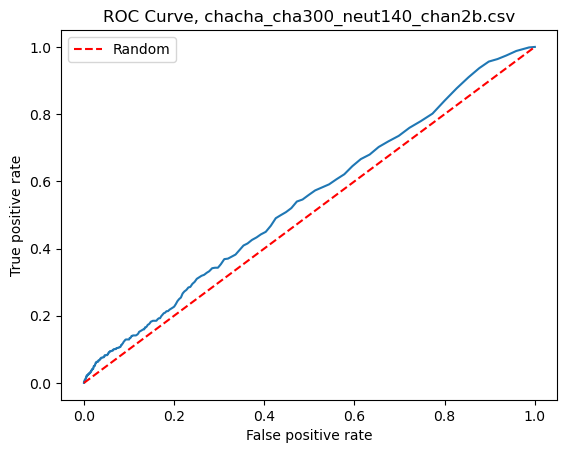

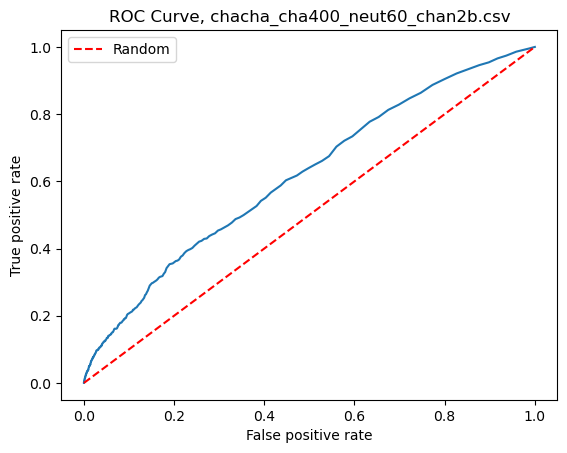

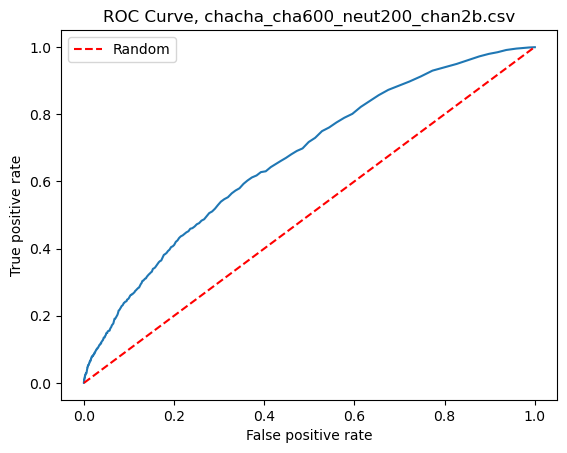

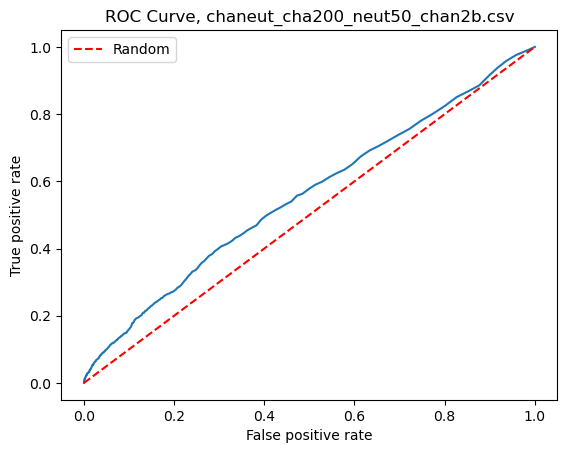

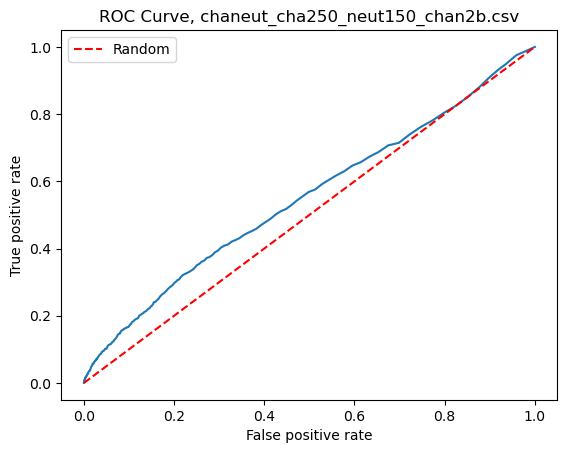

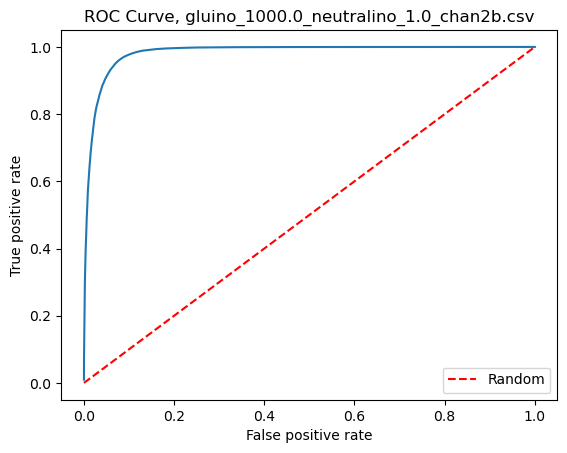

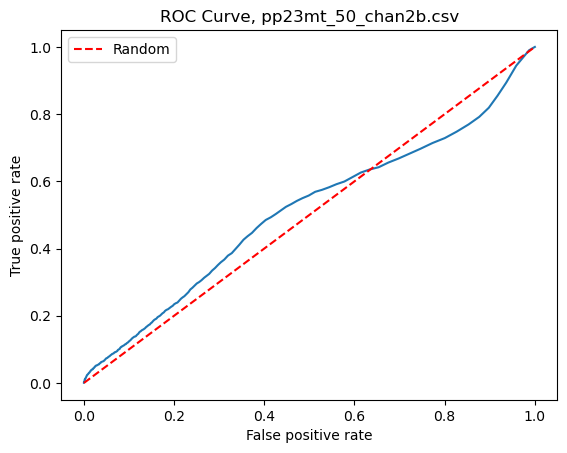

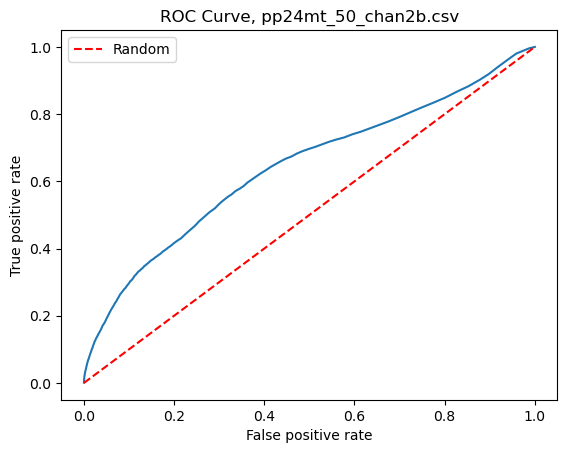

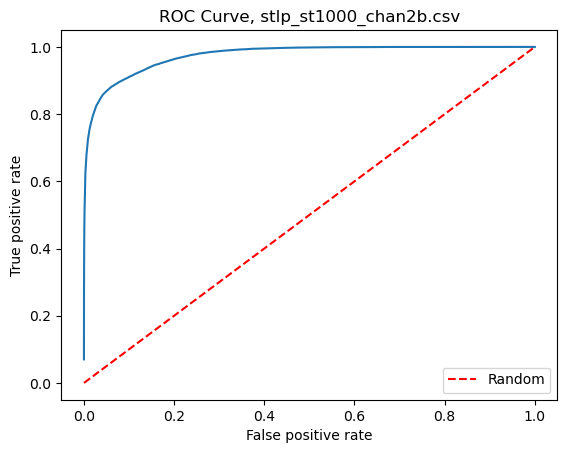

In [23]:
ROC(efficiency_BSM,fp,tn,thresholds,newfiles)

From these ROC curves it is clear which datasets the model has performed best on. The red dotted line represents random classification, and the higher the curve toward the upper left corner the better as this shows that the anomalous data can be separated from the background data well. 

The model performs fairly poorly on the chacha_cha300_neut140_chan2b dataset achieving only slightly better than randomly deicidng which events are anomalous. The next four are somewhat more positive, but then the model's performance on  the gluino_1000.0_neutralino_1.0_chan2b data and stlp_st1000_chan2b data is significantly better demonstrated by an almost vertical ascent before a sharp curve into an almost horizontal line. This aligns with the plotted histograms above because when plotted against the SM data, the BSM peaks are distinct with little overlap of the SM data.

Below I have used the F1 score to determine the best thresholds for each signal dataset to differentiate anomalous and non-anomalous events. The F1 score is the harmonic mean of TP /positive predictions and TP/positive samples. By maximising the F1 Score I find the optimal thresholds. 


F1 score:

In [24]:
#Function to calculate F1 score
def F1score(tp_arr,fn_arr,fp,tn):
    F1 = np.zeros_like(tp_arr)
    for i in range(len(tp_arr[0])):
        
        F1[:,i]= np.divide((2*tp_arr[:,i]),(2*tp_arr[:,i]+fp+fn_arr[:,i]))
        
    return F1

#Function to calculate best thresholds
def best_threshold(thresholds,F1_array):
    optimal_thresholds = []
    for i in range(len(F1_array[0])):
        max_index = np.argmax(F1_array[:,i])
        optimal_thresholds.append(thresholds[max_index])
    
    optimal_thresholds = np.array(optimal_thresholds)
    return optimal_thresholds
    
    
    

In [25]:
F1_array = F1score(tp_arr,fn_arr,fp,tn)

optimal_thresholds = best_threshold(thresholds,F1_array)

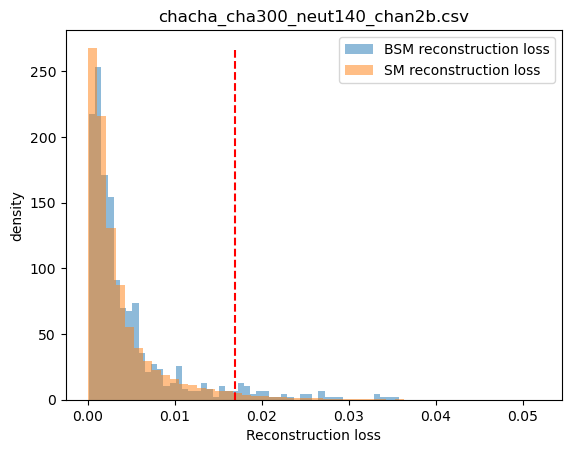

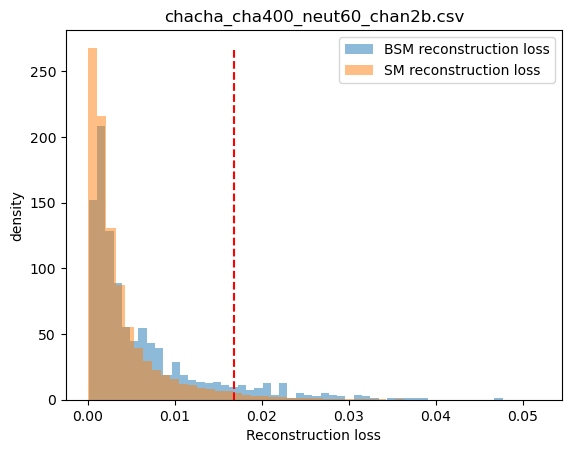

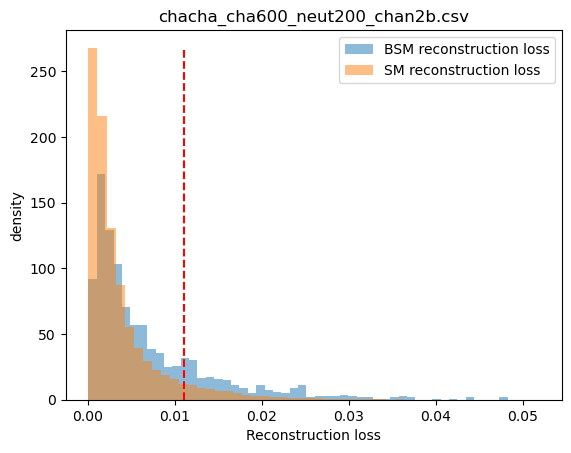

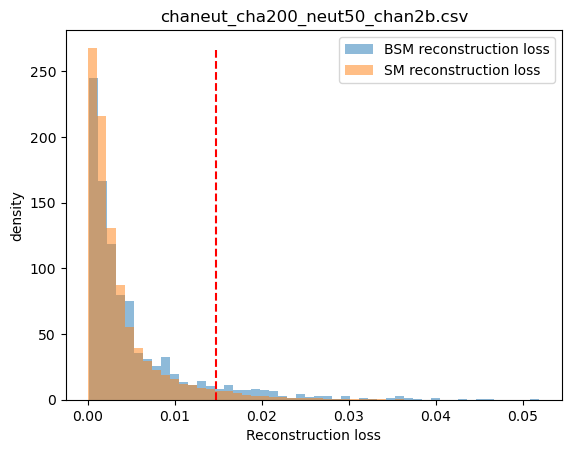

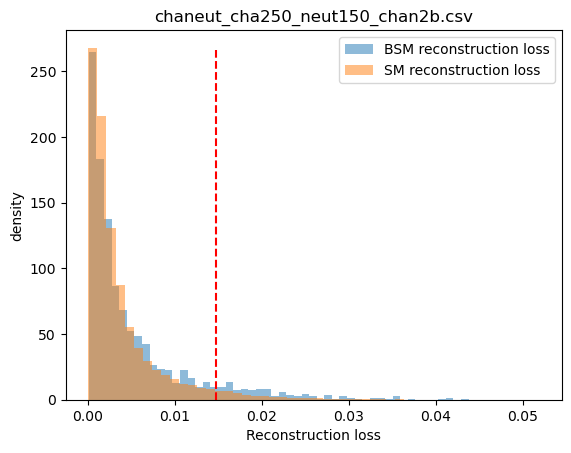

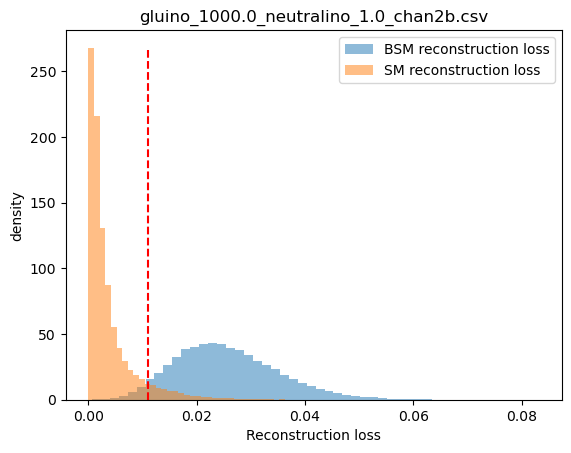

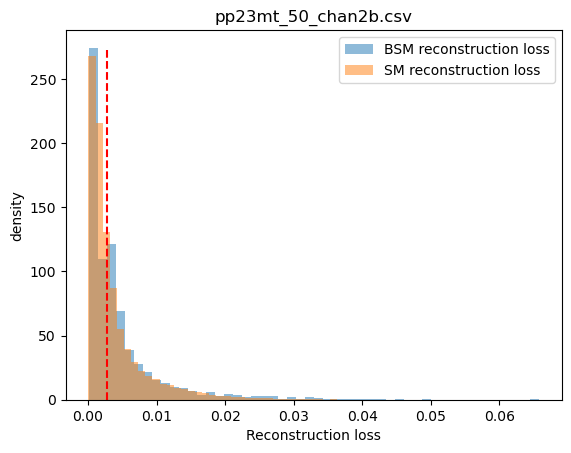

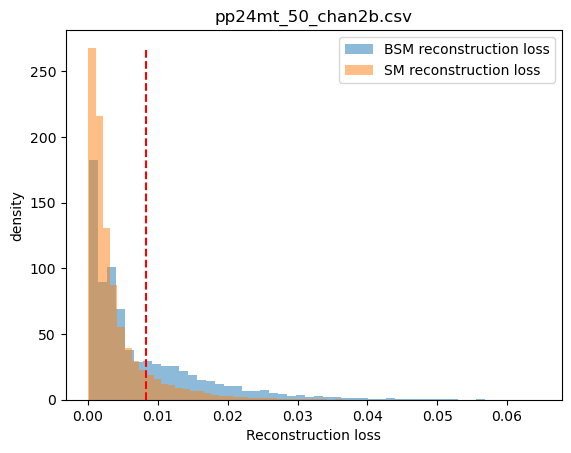

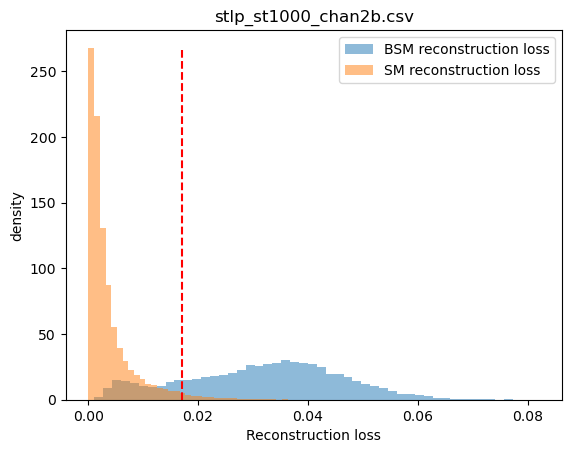

In [26]:

#Function to plot overlayed histograms for SM and BSM reconstruction losses with a red dashed line representing the optimal 
#thresholds.
def plot_loss_new(pred_loss, pred_bck_loss,nfname,optimal_threshold):
    n1 = plt.hist(pred_loss,density=True,bins = 50,alpha = 0.5,label = 'BSM reconstruction loss')
    n2 = plt.hist(pred_bck_loss,density=True,bins = 50,alpha = 0.5, label = 'SM reconstruction loss')
    
    
    plt.vlines(optimal_threshold,ymin = 0,ymax = max([max(n1[0]),max(n2[0])]),color="red", linestyle="--")

    plt.title(nfname)
    plt.legend(loc ='upper right')
    plt.xlabel('Reconstruction loss')
    plt.ylabel('density')
    
    plt.show()
    
for i in range(len(newfiles)):

    
   
    plot_loss_new(pred_losses[i],pred_bck_loss,newfiles[i],optimal_thresholds[i])
    

The above graphs reinforce the above ROC graphs in determining which BSM datasets the model works best on.  For the chacha_cha300_neut140_chan2b dataset, there is almost complete overlap with the SM events which means anomaly detection in this case in extremely difficult and you can see the red dashed line indicating the optimal threshold on this graph is at a much greater reconstruction loss than where the signal data peak lies. In contrast for the  gluino_1000.0_neutralino_1.0_chan2b plot, the dashed threshold line clearly separates the signal peak and background peak so anomaly detection is much easier.

Feature analysis on SM dataset: 

Here the unseen SM data has been split using np.percentile to split off the 5% of events with the highest reconstruction loss. These are the events that 'look' most anomalous. Then a bar chart has been plotted showing the mean values for the features of these SM 'anomalies' and the othe mean values for the features of the other 95% of SM data in order to show which features are most prominent in the 'anomalous' data.

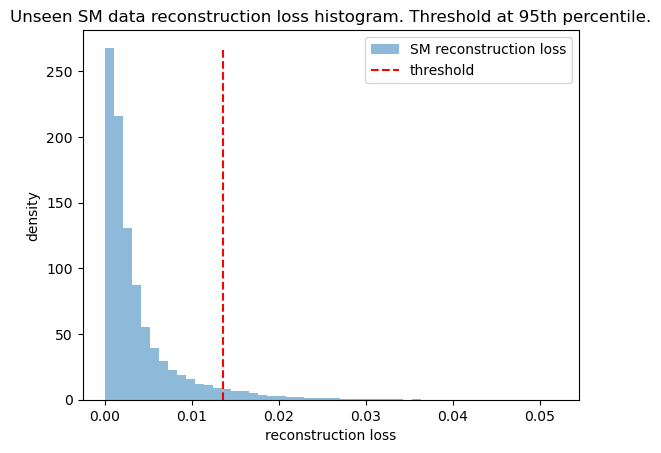

In [27]:
#plt.hist(pred_bck_loss,bins = 50, alpha = 0.5)


threshold_bck = np.percentile(pred_bck_loss,95) #threshold set at 95%

#slice test SM data reconstruction to separate into 'anomalous' and normal data loss
anomaly_bck_loss = pred_bck_loss[pred_bck_loss>threshold_bck]
normal_bck_loss = pred_bck_loss[pred_bck_loss<threshold_bck]

#slice test SM data to separate into 'anomalies' and normal data depending on their reconstruction loss
anomaly_bck = X_test[pred_bck_loss>threshold_bck]
normal_bck = X_test[pred_bck_loss<threshold_bck]

#plot histogram of unseen sm data reconstruction loss
n = plt.hist(pred_bck_loss,density=True,bins = 50,alpha = 0.5, label = 'SM reconstruction loss')

#plot dashed red line which indicatees threshold
plt.vlines(threshold_bck,ymin = 0,ymax =max(n[0]),color="red", linestyle="--",label = 'threshold')
plt.xlabel("reconstruction loss")
plt.ylabel("density")
plt.title('Unseen SM data reconstruction loss histogram. Threshold at 95th percentile.')
plt.legend()
plt.show()

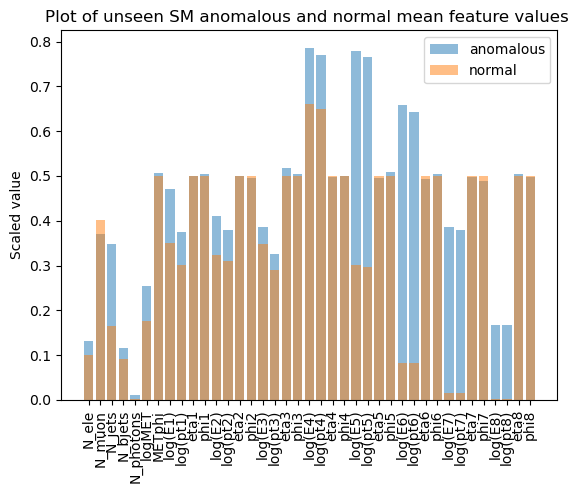

In [28]:

#calculate mean values of features in SM 'anomalous' and normal data
mean_feat_anom = np.mean(anomaly_bck,axis = 0)
mean_feat_norm =  np.mean(normal_bck,axis = 0)

#plot bar charts 
plt.bar(col_names,mean_feat_anom,alpha = 0.5, label = 'anomalous')
plt.bar(col_names,mean_feat_norm, alpha = 0.5, label = 'normal')
plt.title('Plot of unseen SM anomalous and normal mean feature values ')
plt.xticks(rotation ='vertical')
plt.ylabel("Scaled value")
plt.legend()

plt.show()

From these bar charts we see that there are certain features that look more anomalous. We see that the log energies and transverse particle momentums are significantly higher in the 'anomalous' SM data than in the normal SM data, especcially for particles 5 through 8. We also can observe that the number of jets in the anomalous data is much greater than in the normal data. Jets are sprays of particles that fly out from certain high energy particle collisions that create very energetic quarks and gluons. It seems plausible that a greater number of high energy collisions resulting in higher particle energies and momentums may look more anomalous since the model is trained on background events. Furthermore, the bars for phi and eta which describe the azimuth angle and pseudo rapidity are very similar height for both the SM normal and anomalous data. The pseudo rapidity describes the angle of the particle relative to the beam axis. The bar charts suggest that the energy and momentum of the particles in the events are the main features that differentiate the anomalous looking SM events rather than the angles at which the particles are positioned. Again this seems reasonable given that more energetic collisions looks less like background events. The number of photons seems to be approximately zero for the normal data but slightly higher for the anomalous events. This reinforces what I learnt from looking at the initial dataset bar charts where the SM events had fewer number of photons than the BSM events in general with one exception which is the pp23mt_50_chan2b dataset.

Model  Discussion

Overall the model works in some cases but is limited in others. When plotting the ROC curves from the unseen SM data and the BSM data, some of the curves (ie gluino_1000.0_neutralino_1.0_chan2b) showed a great ability to correctly identify the anomalies, with minimal  false positives and false negatives shown by the graphs where I have plotted the F1score optimal threshold lines. However, many of the curves do not display a great model performance ie chacha_cha400_neut60_chan2b.csv. In the worst cases such as with the dataset chacha_cha300_neut140_chan2b, the ROC curve is only marginally better than a random classification of anomalies. 

One issue is that the model was trained using only 30 epochs with a large batch size due to the time restraints of the project. SImilarly, the gridsearch was performed only checking several different parameters and given more time a more comprehensive search could have been performed. For example, I would have liked to explore several different learning rates for the optimizer, more dense layer, and more activation functions. 

For the gridsearch method I performed the grid_search with several parameters, and used these best parameters to refine my gridsearch and make the tested parameters narrower until I reached the current gridsearch I have used here. With more powerful processing power and more time, I would have liked to automate this process. This would have allowed me to put many more initial parameters in and not have to manually refine my gridsearch.

